In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
cds=pd.read_csv('COVID-19_Report.csv',parse_dates=['Date'])
cds

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [69]:
# checking the shape
cds.shape

(23688, 5)

In [70]:
# checking the datatypes
cds.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [71]:
# checking the null values 
cds.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

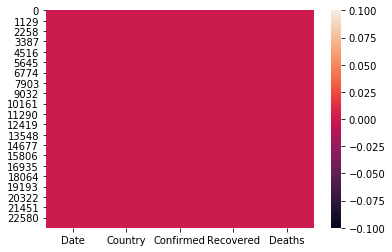

In [72]:
# checking null values through heatmap
sns.heatmap(cds.isnull())

In [73]:
# from date we can get monthly ,daily covid cases
cds_dates=pd.DataFrame()
cds_dates['Month']=cds['Date'].dt.month_name()
cds_dates['Year']=cds['Date'].dt.year
cds_dates['Day']=cds['Date'].dt.day_name()
cds_dates['Confirmed']=cds['Confirmed']
cds_dates['Recovered']=cds['Recovered']
cds_dates['Deaths']=cds['Deaths']
cds_dates

,Month,Year,Day,Confirmed,Recovered,Deaths
0,January,2020,Wednesday,0,0,0
1,January,2020,Wednesday,0,0,0
2,January,2020,Wednesday,0,0,0
3,January,2020,Wednesday,0,0,0
4,January,2020,Wednesday,0,0,0
...,...,...,...,...,...,...
23683,May,2020,Tuesday,429,365,3
23684,May,2020,Tuesday,9,6,1
23685,May,2020,Tuesday,249,10,49
23686,May,2020,Tuesday,920,336,7


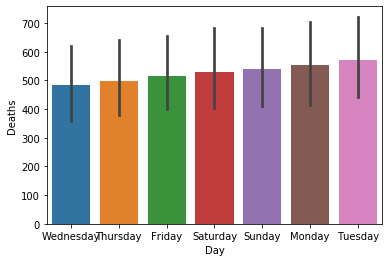

In [74]:
# checking deaths are increasing day by day
sns.barplot(x='Day',y='Deaths',data=cds_dates)

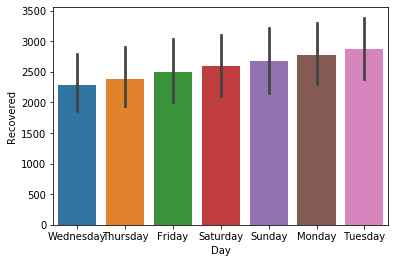

In [75]:
# checking recovered cases day by day
sns.barplot(x='Day',y='Recovered',data=cds_dates)

{'whiskers': [<matplotlib.lines.Line2D at 0x25436811f48>,
 'caps': [<matplotlib.lines.Line2D at 0x2543681ad08>,
 'boxes': [<matplotlib.lines.Line2D at 0x2543672cf48>],
 'medians': [<matplotlib.lines.Line2D at 0x2543681aec8>],
 'fliers': [<matplotlib.lines.Line2D at 0x25436820d88>],
 'means': []}

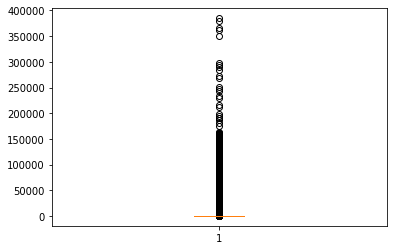

In [76]:
plt.boxplot(cds['Recovered'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25436883948>,
 'caps': [<matplotlib.lines.Line2D at 0x25436883fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x25436752308>],
 'medians': [<matplotlib.lines.Line2D at 0x25436888f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x25436888b48>],
 'means': []}

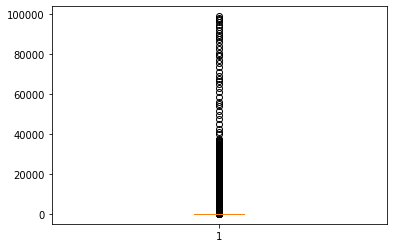

In [77]:
plt.boxplot(cds['Deaths'])

{'whiskers': [<matplotlib.lines.Line2D at 0x254368ea9c8>,
 'caps': [<matplotlib.lines.Line2D at 0x254368ef8c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x254368e7f08>],
 'medians': [<matplotlib.lines.Line2D at 0x254368effc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x254368f3f48>],
 'means': []}

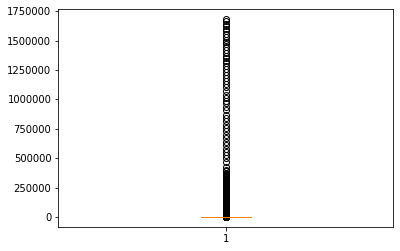

In [78]:
plt.boxplot(cds['Confirmed'])

In [79]:
# spliting the model into input and output variables
x=cds.drop(columns=['Date','Country','Confirmed'])
x.head()

,Recovered,Deaths
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [80]:
y=cds['Confirmed']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Confirmed, dtype: int64

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [82]:
print(x_train.shape,x_test.shape)

(18950, 2) (4738, 2)


In [83]:
print(y_train.shape,y_test.shape)

(18950,) (4738,)


In [84]:
lrg.coef_

array([ 0.88936827, 10.43025242])

In [85]:
lrg.intercept_

100.82272972215469

In [86]:
lrg.score(x_train,y_train)

0.8790935320269673

In [87]:
# to find best fit random state 
from sklearn import linear_model
max_r_score=0
for r_state in range (42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lrg=linear_model.LinearRegression()
    lrg.fit(x_train,y_train)
    y_pred=lrg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print('r2 score cooresponding to random state',r_state,'is:',r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state

print()
print()
print('Max r2 is cooresponding to ',final_r_state,'is:',max_r_score)

r2 score cooresponding to random state 42 is: 0.8950448769812088
r2 score cooresponding to random state 43 is: 0.8779206446720714
r2 score cooresponding to random state 44 is: 0.8400910235645052
r2 score cooresponding to random state 45 is: 0.8898390915011909
r2 score cooresponding to random state 46 is: 0.8919057103979464
r2 score cooresponding to random state 47 is: 0.8474766267265474
r2 score cooresponding to random state 48 is: 0.8775690909232413
r2 score cooresponding to random state 49 is: 0.8441882406260565
r2 score cooresponding to random state 50 is: 0.9094258597898228
r2 score cooresponding to random state 51 is: 0.9111867723500058
r2 score cooresponding to random state 52 is: 0.8555713301732139
r2 score cooresponding to random state 53 is: 0.8905449511101975
r2 score cooresponding to random state 54 is: 0.9028770471501655
r2 score cooresponding to random state 55 is: 0.8980619700856766
r2 score cooresponding to random state 56 is: 0.8404017116175586
r2 score cooresponding to

In [88]:
pred=lrg.predict(x_test)
print('Predicted result',pred)
print('Actual result',y_test)

Predicted result [ 269.37923877  -29.54379188 1919.22783418 ...  -29.54379188  -29.54379188
    3.10242345]
Actual result 19810     798
7507        0
17226    3446
9627        0
16278     422
         ... 
1170        0
9914      337
6902        0
7142        0
16167      23
Name: Confirmed, Length: 4738, dtype: int64


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=96)
lrg=linear_model.LinearRegression()
lrg.fit(x_train,y_train)
y_pred=lrg.predict(x_test)
print('r2_score is ',r2_score(y_test,y_pred))
print('RMSE is ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is  0.9177593654156901
RMSE is  21792.4467170588


In [90]:
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2')

array([0.57076446, 0.91639081, 0.73952717, 0.8388428 , 0.89233265])

In [91]:
from sklearn.externals import joblib
joblib.dump(lrg,'Covid_dataset.pkl')

['Covid_dataset.pkl']